In [4]:
def mc_samples(df,n,reps,replace = False,random_state = 8675309):
    import pandas as pd
    from copy import copy
    cols = copy(df.columns)
    cols = cols.insert(0,'rep')
    mc_samples_to_return = pd.DataFrame().reindex(columns= cols)
    for i in range(0,reps):
        selected_samples_for_rep = pd.DataFrame(df.sample(n,replace=replace,random_state=random_state))
        rep_number = []
        for j in range(0,n):
            rep_number.append([copy(i)])
        rep_number = pd.DataFrame(rep_number)
        rep_number.columns = ['rep_number']
        selected_samples_for_rep.reset_index(drop=True, inplace=True)
        selected_samples_for_rep = pd.concat((copy(rep_number),copy(selected_samples_for_rep)),axis = 1,ignore_index = True,sort=False)
        selected_samples_for_rep.columns = cols
        mc_samples_to_return = pd.concat((copy(mc_samples_to_return),copy(selected_samples_for_rep)), axis = 0,sort=False)
        random_state += 1
    mc_samples_to_return = mc_samples_to_return.groupby(by='rep')
    return mc_samples_to_return

In [5]:
import dask
from dask import dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame([[0,1],[2,3],[4,5],[6,7],[8,9]])
df.columns = ['a','b']

In [8]:
samples = mc_samples(df = df, n = 100,reps = 100, replace = True)
print('success')

success


In [9]:
a_sample_means = samples['a'].mean()

<AxesSubplot:ylabel='Density'>

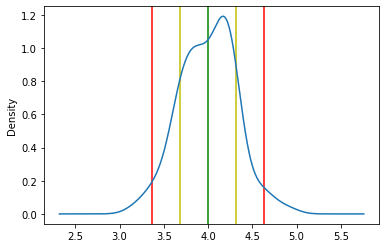

In [10]:
standard_error_hat = a_sample_means.std()
mean_of_sample_means = a_sample_means.mean()
plt.axvline(mean_of_sample_means + standard_error_hat,color='y')
plt.axvline(mean_of_sample_means - standard_error_hat,color='y')
plt.axvline(mean_of_sample_means + 2 * standard_error_hat,color='r')
plt.axvline(mean_of_sample_means - 2 * standard_error_hat,color='r')

original_sample_mean = df['a'].mean()
plt.axvline(original_sample_mean, color = 'g')

a_sample_means.plot.density()

In [13]:
print(samples.head())

     rep    a    b
0    0.0  2.0  3.0
1    0.0  8.0  9.0
2    0.0  8.0  9.0
3    0.0  0.0  1.0
4    0.0  0.0  1.0
..   ...  ...  ...
0   99.0  0.0  1.0
1   99.0  6.0  7.0
2   99.0  0.0  1.0
3   99.0  2.0  3.0
4   99.0  2.0  3.0

[500 rows x 3 columns]
